<a href="https://colab.research.google.com/github/anjaleeDS/DAT6-git-lab/blob/master/fivethirtyeightHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreate this graph:
https://projects.fivethirtyeight.com/trump-approval-ratings/voters/

## Init

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import altair as alt
from datetime import datetime
from datetime import timedelta


%load_ext google.colab.data_table

##Get Data

In [0]:
# state_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/urbanization-index/urbanization-state.csv', error_bad_lines=False)
# census_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/urbanization-index/urbanization-census-tract.csv', error_bad_lines=False)

from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive


In [0]:
%ls
plist_df = pd.read_csv('approval_polllist.csv')
tline_df = pd.read_csv('approval_topline.csv')
style.use('fivethirtyeight')
tline_df.head(8)

 approval_polllist.csv  'Colab Notebooks'/
 approval_topline.csv   'Getting started.pdf'


,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,4/29/2020,42.723025,46.545017,38.901033,52.614647,56.202069,49.027226,17:44:07 29 Apr 2020
1,Donald Trump,Adults,4/29/2020,43.021307,46.379862,39.662752,52.159112,56.863868,47.454356,17:42:35 29 Apr 2020
2,Donald Trump,All polls,4/29/2020,42.563159,46.281516,38.844803,52.668005,56.718638,48.617373,17:41:36 29 Apr 2020
3,Donald Trump,Adults,4/28/2020,43.156577,46.587085,39.726069,51.925153,56.804669,47.045637,23:03:38 28 Apr 2020
4,Donald Trump,Voters,4/28/2020,42.691683,46.569246,38.814120,52.710678,56.350641,49.070715,23:05:10 28 Apr 2020
5,Donald Trump,All polls,4/28/2020,42.599133,46.328493,38.869772,52.571193,56.717958,48.424429,23:02:39 28 Apr 2020
6,Donald Trump,Voters,4/27/2020,43.652574,47.545359,39.759789,52.622846,56.206408,49.039283,15:26:04 27 Apr 2020
7,Donald Trump,Adults,4/27/2020,43.134294,46.621165,39.647423,52.092446,57.102981,47.081910,15:24:33 27 Apr 2020


## Select only Voters

- graph on page looks like it's just plotting the estimate values for approve and disapprove
- graph on page's filled section is the high and lo values of approve and disapprove

In [0]:
voters_df = tline_df.loc[tline_df['subgroup'] == "Voters"]
voters_df.dtypes

# if i have time will do parsing of all subgroups
# out = tline_df.groupby('subgroup')['timestamp'].sum()
# out.head(20)

president               object
subgroup                object
modeldate               object
approve_estimate       float64
approve_hi             float64
approve_lo             float64
disapprove_estimate    float64
disapprove_hi          float64
disapprove_lo          float64
timestamp               object
dtype: object

In [0]:
# convert timestamp to type datetime using #plot_df.dtypes
voters_df['dates'] = pd.to_datetime(voters_df['timestamp'])
# voters_df['fdates'] = str(voters_df['timestamp']).astypes('Int32')
voters_df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


president                      object
subgroup                       object
modeldate                      object
approve_estimate              float64
approve_hi                    float64
approve_lo                    float64
disapprove_estimate           float64
disapprove_hi                 float64
disapprove_lo                 float64
timestamp                      object
dates                  datetime64[ns]
dtype: object

## Get the points plotted and some of the labels set

In [0]:
al_j
# voters_df.dates.min()-timedelta(days=2)
# from datetime import timedelta
# x = voters_df.dates+ timedelta(days=3)
# x

0       38.934417
4       38.662658
6       39.861366
11      40.033930
12      40.041161
          ...    
3565    39.763071
3569    40.003446
3572    43.135962
3574    39.644014
3578    39.828189
Name: approve_lo, Length: 1193, dtype: float64

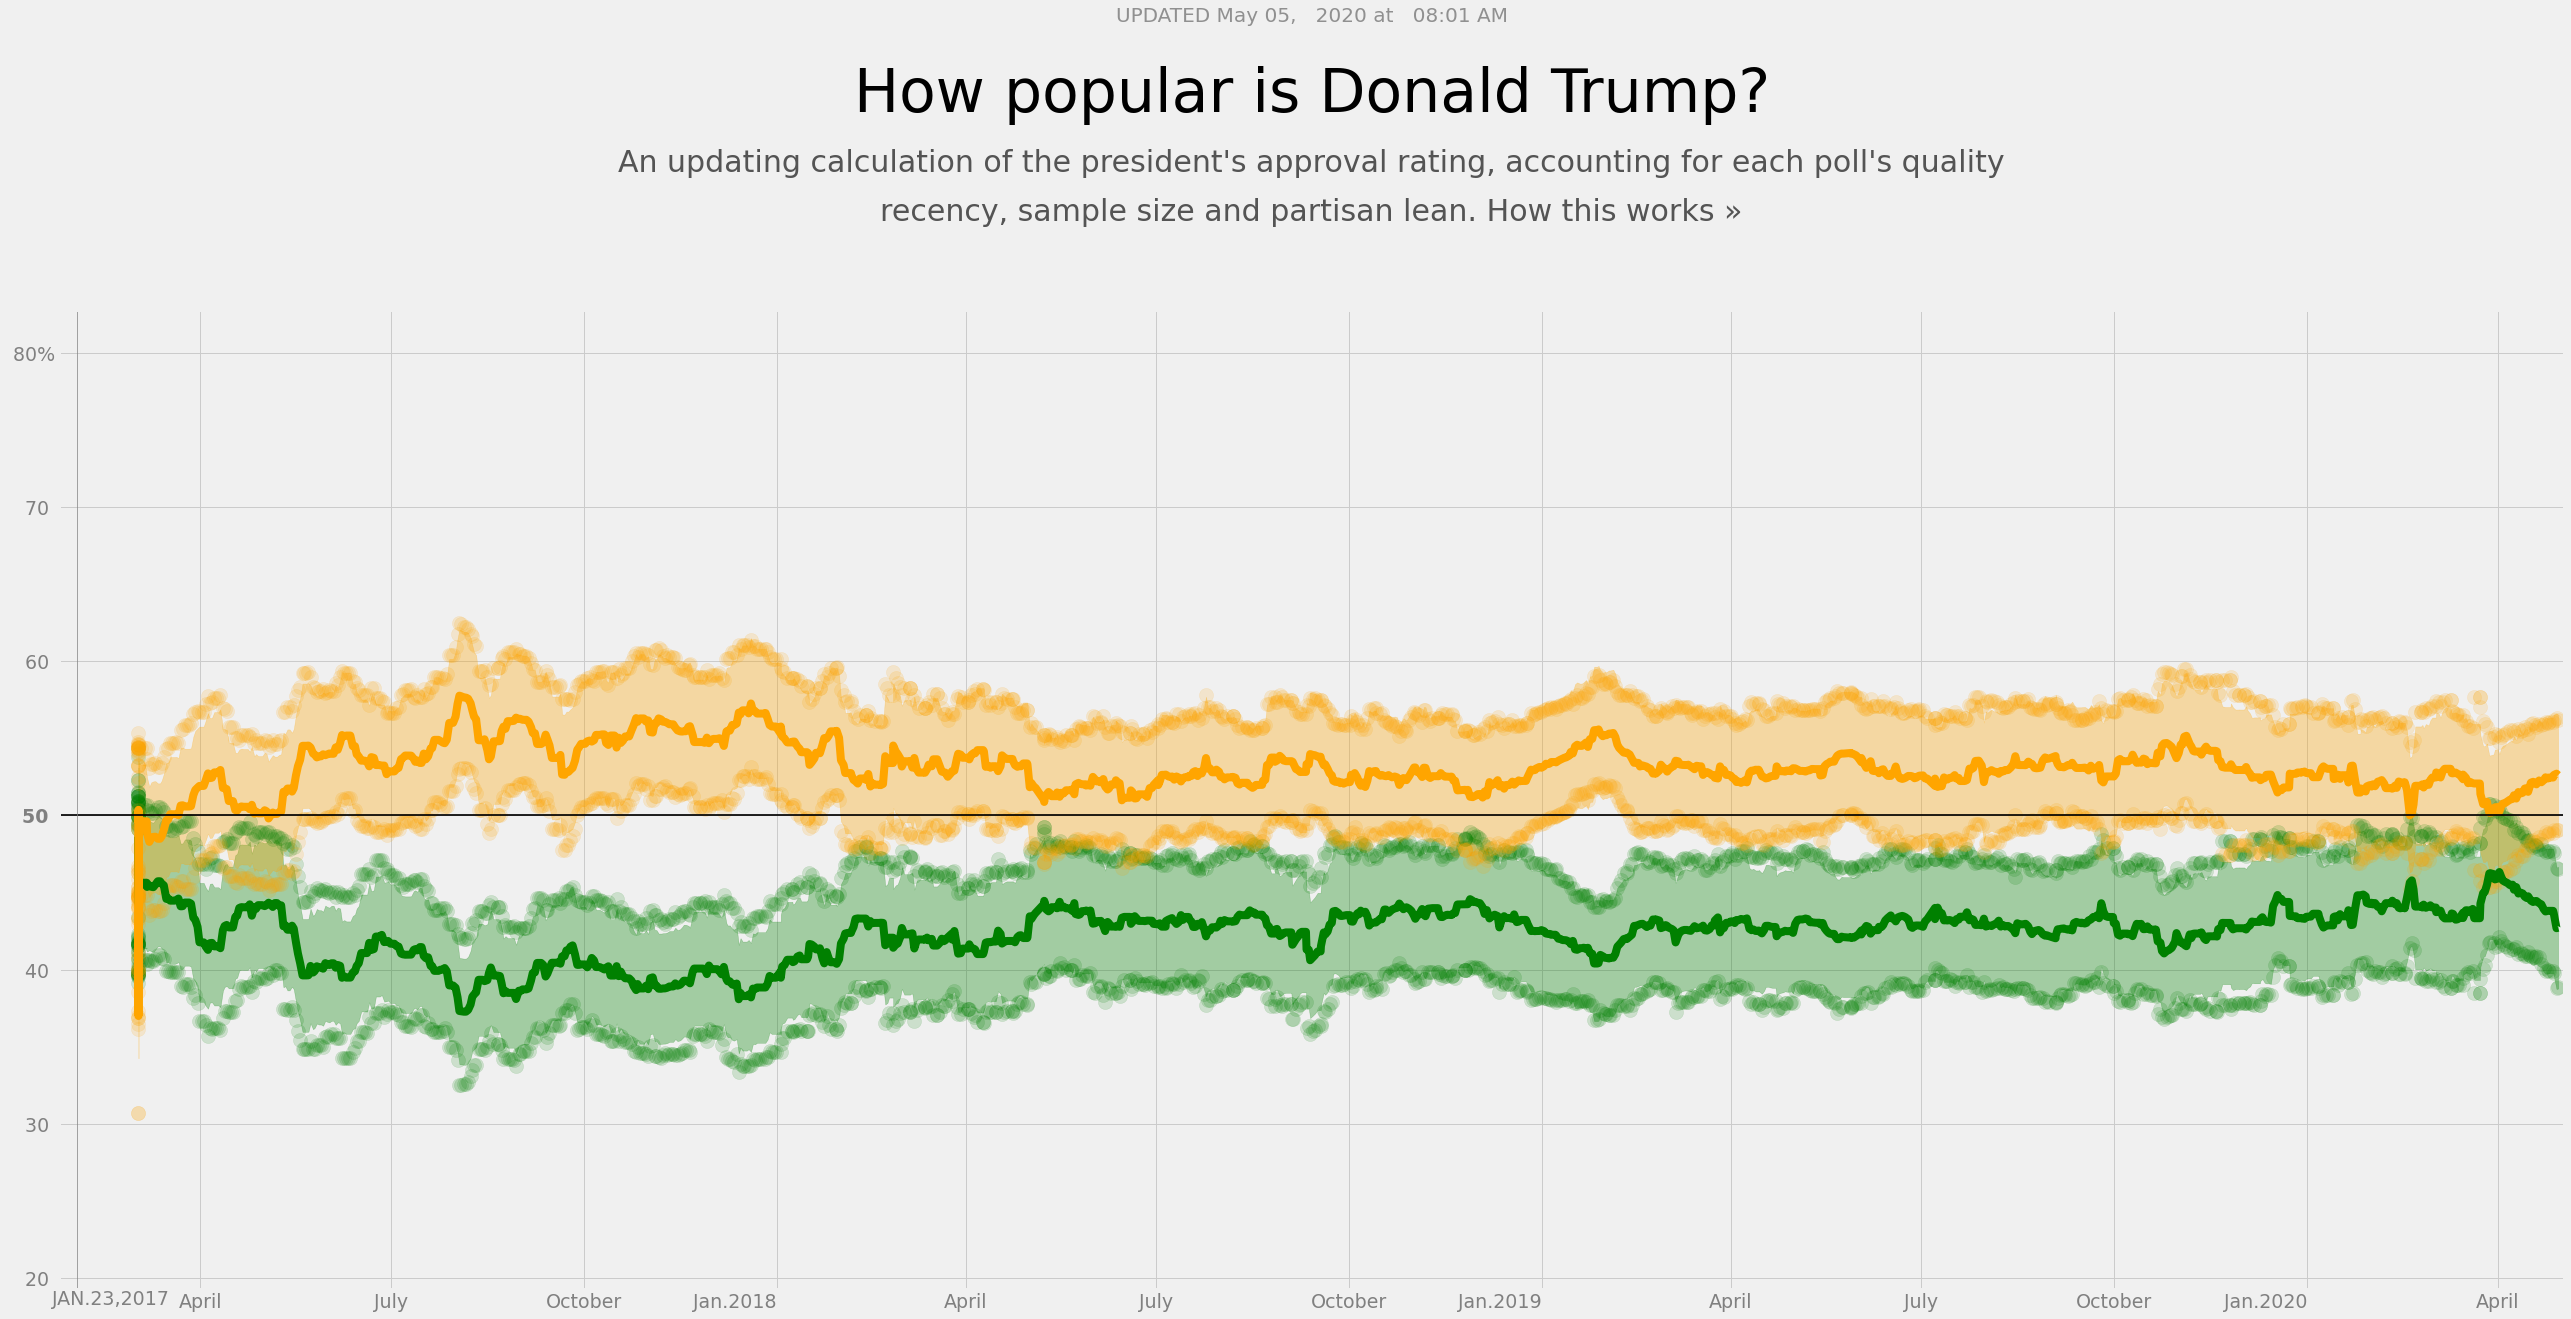

In [0]:
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from time import gmtime, strftime

ax = plt.gca() # gca = get current axis

# estimate - this is a connected line graph
va = voters_df.plot(kind='line', x='dates', y='approve_estimate', color='green', figsize=(40,17), linewidth=8, legend=False, ax=ax)
vd = voters_df.plot(kind='line', x='dates', y='disapprove_estimate', color='orange', figsize=(40,17), linewidth=8, legend=False, ax=ax)

# conf interval needs to be calculated with values not axessubplots
va_fill = (voters_df['approve_estimate']*2.25) * (np.std(voters_df['approve_estimate'])/np.mean(voters_df['approve_estimate']))
vd_fill = (voters_df['disapprove_estimate']*2.25) * (np.std(voters_df['approve_estimate'])/np.mean(voters_df['disapprove_estimate']))

#some confidence interval
ax.fill_between(x=voters_df['dates'], y1=(voters_df['approve_estimate']+va_fill), y2=(voters_df['approve_estimate']-va_fill), color='green', alpha=.32)
ax.fill_between(x=voters_df['dates'], y1=(voters_df['disapprove_estimate']+vd_fill), y2=(voters_df['disapprove_estimate']-vd_fill), color='orange', alpha=.32)


# this is the dots for high and lows of the approval and disapproval
al = voters_df.plot(kind='scatter', x='timestamp', y='approve_lo', color='green', figsize=(40,20), s=200, alpha=.15,  ax=ax)
ah = voters_df.plot(kind='scatter', x='timestamp', y='approve_hi', color='green', figsize=(40,20), s=200, alpha=.15,  ax=ax)
dl = voters_df.plot(kind='scatter', x='timestamp', y='disapprove_lo', color='orange', figsize=(40,20), s=200, alpha=.15,  ax=ax)
dh = voters_df.plot(kind='scatter', x='timestamp', y='disapprove_hi', color='orange', figsize=(40,20), s=200, alpha=.15,  ax=ax)



###########   ADD OTHER DOTS FROM OTHER NON-VOTER GROUPS????        ##############


# Adding a title and a subtitle

thetime = strftime("UPDATED %b %d,   %Y at   %H:%M %p", gmtime())
starttext = 1.3

va.text(0.5, starttext, s = thetime, horizontalalignment='center', alpha=.4, 
        verticalalignment='center', transform=ax.transAxes, fontsize = 20)
va.text(0.5, starttext-0.08, s = r"How popular is Donald Trump?", horizontalalignment='center',  
        verticalalignment='center', transform=ax.transAxes, fontsize = 60)
va.text(0.5, starttext-0.15, s = "An updating calculation of the president's approval rating, accounting for each poll's quality", 
        horizontalalignment='center',  verticalalignment='center', transform=ax.transAxes, fontsize = 30, alpha=.65)
va.text(0.5, starttext-0.2, s = "recency, sample size and partisan lean. " + u"How this works »", 
        horizontalalignment='center',  verticalalignment='center', transform=ax.transAxes, fontsize = 30, alpha=.65)

fls = 19 # font label size

# Take out x, y axis legend
va.xaxis.label.set_visible(False)
va.yaxis.label.set_visible(False)

# Bold horizontal line at y=50
va.axhline(y=50, alpha=0.7, linewidth = 1.75, color='black')
vd.axhline(y=50, alpha=0.7, linewidth = 1.75, color='black')

# Grey vertical line at beginning of x
vd.axvline(x='2017-02-01', alpha=0.7, linewidth = 1, color='grey')
vd.text(x='2017-01-20', y=18.3, s='JAN.23,2017', fontsize=fls, color='grey')


# Ticks for x
va.tick_params(axis='x', which='major', labelsize=fls, labelcolor='grey')
va.tick_params(axis='x', which='minor', labelsize=fls, labelcolor='grey', gridOn=True)


# Set x ticks
va.set_xlim('2017-01-23 11:26:02', voters_df.dates.max()+timedelta(days=3))

va.xaxis.set_major_locator(mdates.YearLocator())
va.xaxis.set_major_formatter(mdates.DateFormatter('%b.%Y'))

va.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
va.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))


# Ticks for y
va.tick_params(axis='y', which='both', labelsize=fls, labelcolor='grey')

# Set y ticks
va.set_ylim(voters_df.approve_estimate.min()-18, voters_df.disapprove_estimate.max()+25, 50)

va.set_yticklabels(labels = [-1, '20 ', '30 ', '40 ', '50 ', '60 ', '70 ', ' 80%'])
va.get_yticklabels()[-5].set_weight("bold")



## get fills of the lo and hi values

In [0]:

newx = voters_df['dates'].values
newx.dtype
# plt.fill_between(newx, y1=al, y2=ah, color='b', interpolate=True, alpha=0.2)




In [0]:
# test_df = np.array(voters_df['dates'], dtype=float)
# test_df
ah.dtypes

In [0]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x)
# Copy to clipboard
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')

## labeling fuckery

In [0]:
# plot_df.head(10)

ax = plt.gca() # gca = get current axis

pergatory1 = plot_df.plot(kind='scatter', x='timestamp', y='approve_hi', color='green', figsize=(90,20), ax=ax)
# pergatory2 = plot_df.plot(kind='scatter', x='timestamp', y='disapprove_hi', color='orange', figsize=(90,20), ax=ax)
pergatory1.xaxis.label.set_visible(False)
pergatory1.yaxis.label.set_visible(False)

plt.show()

In [0]:
my_n_steps = 3
pergatory1 = pd.DataFrame(time_series_array)
smooth_pergatory1 = pergatory1.rolling(my_n_steps).mean()
deviation_pergatory1 = 2 * pergatory1.rolling(n_steps).std()

under = (smooth_pergatory1-deviation_pergatory1)[0]
over = (smooth_pergatory1+deviation_pergatory1)[0]

dx = plt.subplots(figsize=(15,10))
#Plotting:
plt.plot(smooth_pergatory1, linewidth=2) #mean curve
plt.fill_between(deviation_pergatory1.index, under, over, color='b', alpha=.1) #std curves.
# plt.gcf().figsize(100,10)

plt.show()

## example from https://stackoverflow.com/questions/50161140/how-to-plot-a-time-series-array-with-confidence-intervals-displayed-in-python

In [0]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

#Declare the array containing the series you want to plot. 
#For example:
time_series_array = np.sin(np.linspace(-np.pi, np.pi, 400)) + np.random.rand((400))
n_steps           = 15 #number of rolling steps for the mean/std.

#Compute curves of interest:
time_series_df = pd.DataFrame(time_series_array)
smooth_path    = time_series_df.rolling(n_steps).mean()
path_deviation = 2 * time_series_df.rolling(n_steps).std()

under_line     = (smooth_path-path_deviation)[0]
over_line      = (smooth_path+path_deviation)[0]

#Plotting:
plt.plot(smooth_path, linewidth=2) #mean curve.
plt.fill_between(path_deviation.index, under_line, over_line, color='b', alpha=.1) #std curves.